In [1]:
import os
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from datetime import datetime


In [2]:
train = pd.read_csv("train.csv", parse_dates=["Date"], low_memory=False)
test = pd.read_csv("test.csv", parse_dates=["Date"], low_memory=False)
store = pd.read_csv("store.csv")


In [3]:
print("train dataset\n")
print(train.head())
print("\ntest dataset\n")
print(test.head())
print("\nstore dataset\n")
print(store.head())


train dataset

   Store  DayOfWeek       Date  Sales  Customers  Open  Promo StateHoliday  \
0      1          5 2015-07-31   5263        555     1      1            0   
1      2          5 2015-07-31   6064        625     1      1            0   
2      3          5 2015-07-31   8314        821     1      1            0   
3      4          5 2015-07-31  13995       1498     1      1            0   
4      5          5 2015-07-31   4822        559     1      1            0   

   SchoolHoliday  
0              1  
1              1  
2              1  
3              1  
4              1  

test dataset

   Id  Store  DayOfWeek       Date  Open  Promo StateHoliday  SchoolHoliday
0   1      1          4 2015-09-17   1.0      1            0              0
1   2      3          4 2015-09-17   1.0      1            0              0
2   3      7          4 2015-09-17   1.0      1            0              0
3   4      8          4 2015-09-17   1.0      1            0              0
4   5  

In [4]:
print("Missing values in train dataset:")
print(train.isnull().sum())
print("\nMissing values in test dataset:")
print(test.isnull().sum())
print("\nMissing values in store dataset:")
print(store.isnull().sum())


Missing values in train dataset:
Store            0
DayOfWeek        0
Date             0
Sales            0
Customers        0
Open             0
Promo            0
StateHoliday     0
SchoolHoliday    0
dtype: int64

Missing values in test dataset:
Id                0
Store             0
DayOfWeek         0
Date              0
Open             11
Promo             0
StateHoliday      0
SchoolHoliday     0
dtype: int64

Missing values in store dataset:
Store                          0
StoreType                      0
Assortment                     0
CompetitionDistance            3
CompetitionOpenSinceMonth    354
CompetitionOpenSinceYear     354
Promo2                         0
Promo2SinceWeek              544
Promo2SinceYear              544
PromoInterval                544
dtype: int64


In [5]:
test['Open'].fillna(1, inplace=True)


In [6]:
store['CompetitionDistance'].fillna(store['CompetitionDistance'].median(), inplace=True)


In [7]:
store['CompetitionOpenSinceMonth'].fillna(1, inplace=True)
store['CompetitionOpenSinceYear'].fillna(store['CompetitionOpenSinceYear'].min(), inplace=True)


In [8]:
store['Promo2SinceWeek'].fillna(0, inplace=True)
store['Promo2SinceYear'].fillna(0, inplace=True)
store['PromoInterval'].fillna('No Promo', inplace=True)


In [9]:
print("\nMissing values in test dataset:")
print(test.isnull().sum())
print("\nMissing values in store dataset:")
print(store.isnull().sum())


Missing values in test dataset:
Id               0
Store            0
DayOfWeek        0
Date             0
Open             0
Promo            0
StateHoliday     0
SchoolHoliday    0
dtype: int64

Missing values in store dataset:
Store                        0
StoreType                    0
Assortment                   0
CompetitionDistance          0
CompetitionOpenSinceMonth    0
CompetitionOpenSinceYear     0
Promo2                       0
Promo2SinceWeek              0
Promo2SinceYear              0
PromoInterval                0
dtype: int64


In [10]:
# Merge the train and store datasets on the 'Store' column to have all the relevant information for each store in one DataFrame.
train_merged = train.merge(store, on='Store')
train_merged.head()


,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,5,2015-07-31,5263,555,1,1,0,1,c,a,1270.0,9.0,2008.0,0,0.0,0.0,No Promo
1,1,4,2015-07-30,5020,546,1,1,0,1,c,a,1270.0,9.0,2008.0,0,0.0,0.0,No Promo
2,1,3,2015-07-29,4782,523,1,1,0,1,c,a,1270.0,9.0,2008.0,0,0.0,0.0,No Promo
3,1,2,2015-07-28,5011,560,1,1,0,1,c,a,1270.0,9.0,2008.0,0,0.0,0.0,No Promo
4,1,1,2015-07-27,6102,612,1,1,0,1,c,a,1270.0,9.0,2008.0,0,0.0,0.0,No Promo


In [11]:
# Extract the month from the 'Date' column and create a new 'Month' column
train_merged['Month'] = train_merged['Date'].dt.month

# Create a new 'SalesPerCustomer' column by dividing 'Sales' by 'Customers'
train_merged['SalesPerCustomer'] = train_merged['Sales'] / train_merged['Customers']

# Calculate the age of the competition in months and create a new 'CompetitionAge' column
train_merged['CompetitionAge'] = (train_merged['Date'].dt.year - train_merged['CompetitionOpenSinceYear']) * 12 + (train_merged['Date'].dt.month - train_merged['CompetitionOpenSinceMonth'])

train_merged.head()



,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,StoreType,...,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval,Month,SalesPerCustomer,CompetitionAge
0,1,5,2015-07-31,5263,555,1,1,0,1,c,...,1270.0,9.0,2008.0,0,0.0,0.0,No Promo,7,9.482883,82.0
1,1,4,2015-07-30,5020,546,1,1,0,1,c,...,1270.0,9.0,2008.0,0,0.0,0.0,No Promo,7,9.194139,82.0
2,1,3,2015-07-29,4782,523,1,1,0,1,c,...,1270.0,9.0,2008.0,0,0.0,0.0,No Promo,7,9.143403,82.0
3,1,2,2015-07-28,5011,560,1,1,0,1,c,...,1270.0,9.0,2008.0,0,0.0,0.0,No Promo,7,8.948214,82.0
4,1,1,2015-07-27,6102,612,1,1,0,1,c,...,1270.0,9.0,2008.0,0,0.0,0.0,No Promo,7,9.970588,82.0


In [12]:
#preprocess the test dataset in the same way as train dataset

# Merge the test and store datasets
test_merged = pd.merge(test, store, on='Store', how='left')

# Fill missing 'Open' values with 1 (store is open)
test_merged['Open'].fillna(1, inplace=True)

# Replace missing 'CompetitionDistance' values with the median
test_merged['CompetitionDistance'].fillna(test_merged['CompetitionDistance'].median(), inplace=True)

# Fill missing 'CompetitionOpenSinceMonth' and 'CompetitionOpenSinceYear' with the earliest available data
test_merged['CompetitionOpenSinceMonth'].fillna(test_merged['Date'].dt.month.min(), inplace=True)
test_merged['CompetitionOpenSinceYear'].fillna(test_merged['Date'].dt.year.min(), inplace=True)

# Replace PromoInterval NaN values with "No Promo"
test_merged['PromoInterval'].fillna("No Promo", inplace=True)

# Create 'Month' feature
test_merged['Month'] = test_merged['Date'].dt.month

# Calculate the age of the competition in months and create a new 'CompetitionAge' column
test_merged['CompetitionAge'] = (test_merged['Date'].dt.year - test_merged['CompetitionOpenSinceYear']) * 12 + (test_merged['Date'].dt.month - test_merged['CompetitionOpenSinceMonth'])

# Display the first few rows of the modified dataset
test_merged.head()


,Id,Store,DayOfWeek,Date,Open,Promo,StateHoliday,SchoolHoliday,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval,Month,CompetitionAge
0,1,1,4,2015-09-17,1.0,1,0,0,c,a,1270.0,9.0,2008.0,0,0.0,0.0,No Promo,9,84.0
1,2,3,4,2015-09-17,1.0,1,0,0,a,a,14130.0,12.0,2006.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct",9,105.0
2,3,7,4,2015-09-17,1.0,1,0,0,a,c,24000.0,4.0,2013.0,0,0.0,0.0,No Promo,9,29.0
3,4,8,4,2015-09-17,1.0,1,0,0,a,a,7520.0,10.0,2014.0,0,0.0,0.0,No Promo,9,11.0
4,5,9,4,2015-09-17,1.0,1,0,0,a,c,2030.0,8.0,2000.0,0,0.0,0.0,No Promo,9,181.0


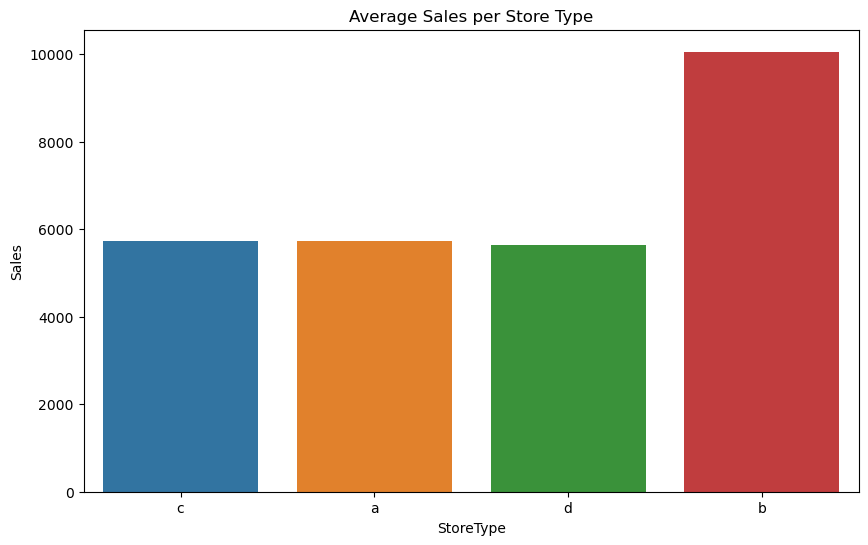

In [13]:
plt.figure(figsize=(10, 6))
sns.barplot(x='StoreType', y='Sales', data=train_merged, ci=None)
plt.title('Average Sales per Store Type')
plt.show()


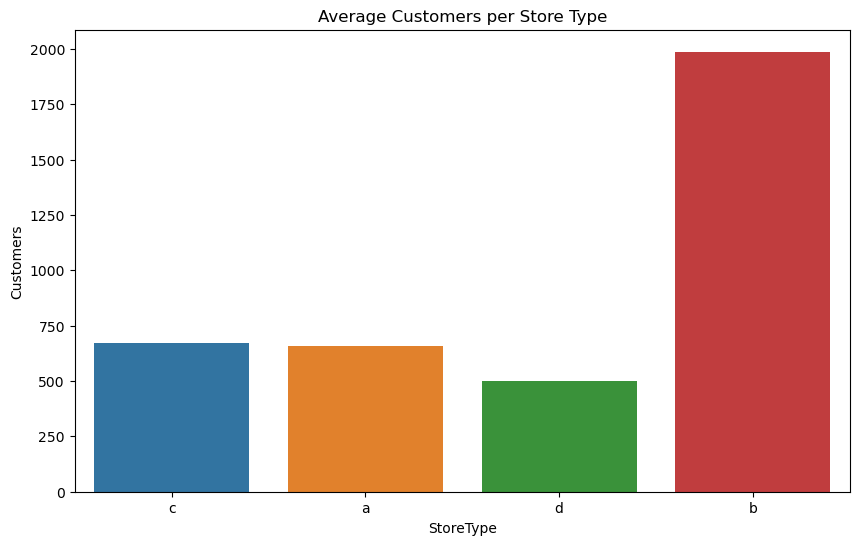

In [14]:
# Store Type vs. Customers
plt.figure(figsize=(10, 6))
sns.barplot(x='StoreType', y='Customers', data=train_merged, ci=None)
plt.title('Average Customers per Store Type')
plt.show()


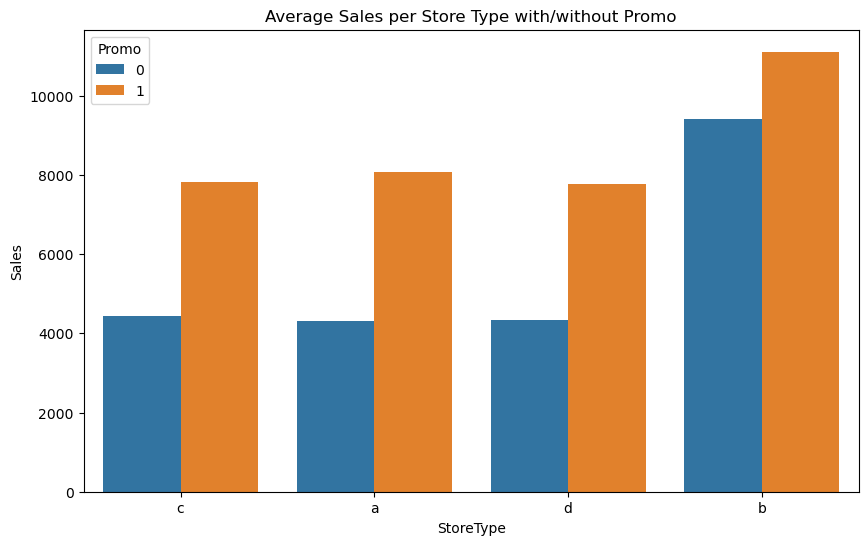

In [15]:
# Store Type vs. Promo
plt.figure(figsize=(10, 6))
sns.barplot(x='StoreType', y='Sales', hue='Promo', data=train_merged, ci=None)
plt.title('Average Sales per Store Type with/without Promo')
plt.show()


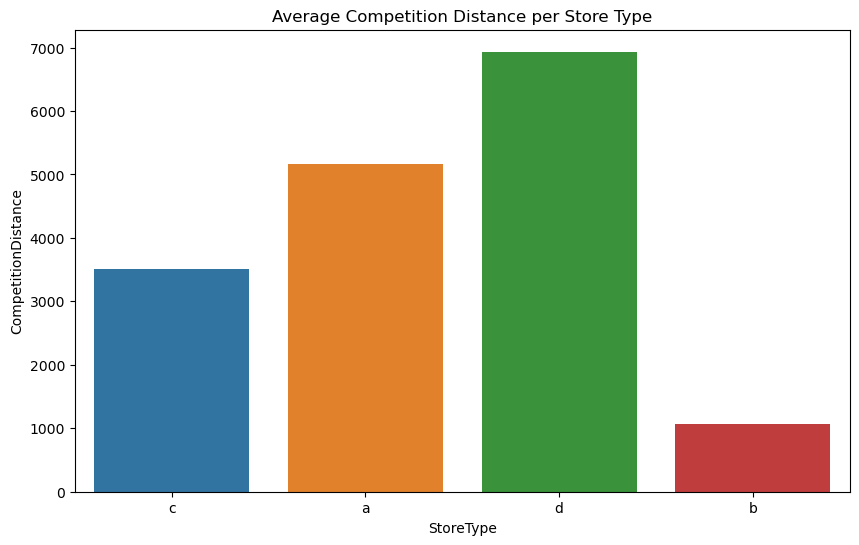

In [16]:
# Store Type vs. CompetitionDistance
plt.figure(figsize=(10, 6))
sns.barplot(x='StoreType', y='CompetitionDistance', data=train_merged, ci=None)
plt.title('Average Competition Distance per Store Type')
plt.show()


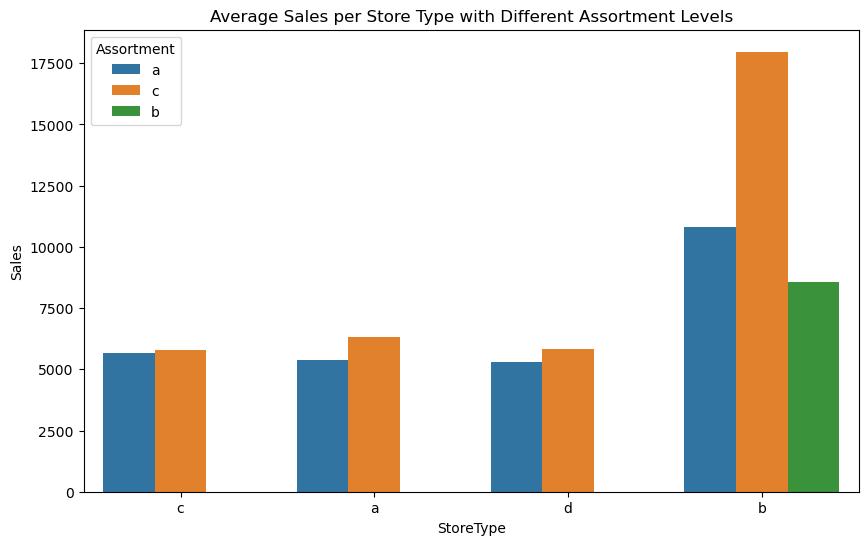

In [17]:
# Store Type vs. Sales with different Assortment levels
plt.figure(figsize=(10, 6))
sns.barplot(x='StoreType', y='Sales', hue='Assortment', data=train_merged, ci=None)
plt.title('Average Sales per Store Type with Different Assortment Levels')
plt.show()


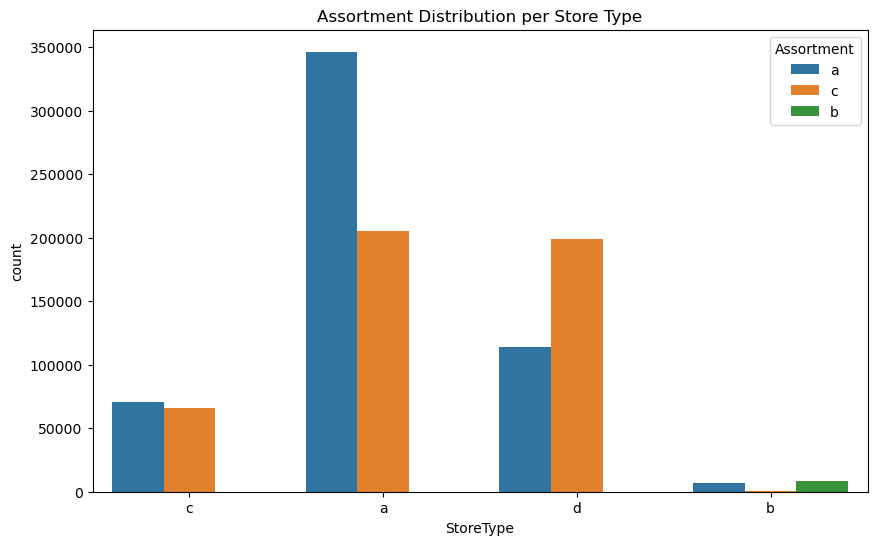

In [18]:
# Store Type vs. Assortment
plt.figure(figsize=(10, 6))
sns.countplot(x='StoreType', hue='Assortment', data=train_merged)
plt.title('Assortment Distribution per Store Type')
plt.show()


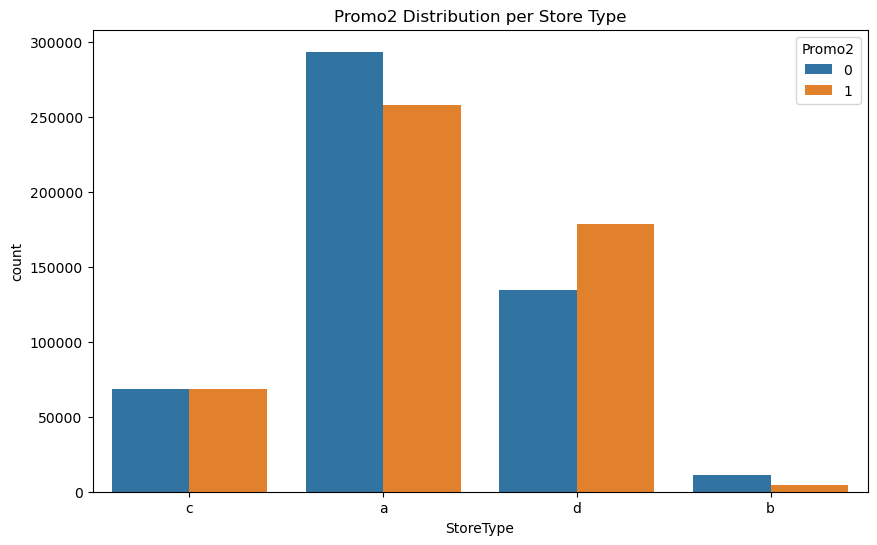

In [19]:
# Store Type vs. Promo2
plt.figure(figsize=(10, 6))
sns.countplot(x='StoreType', hue='Promo2', data=train_merged)
plt.title('Promo2 Distribution per Store Type')
plt.show()


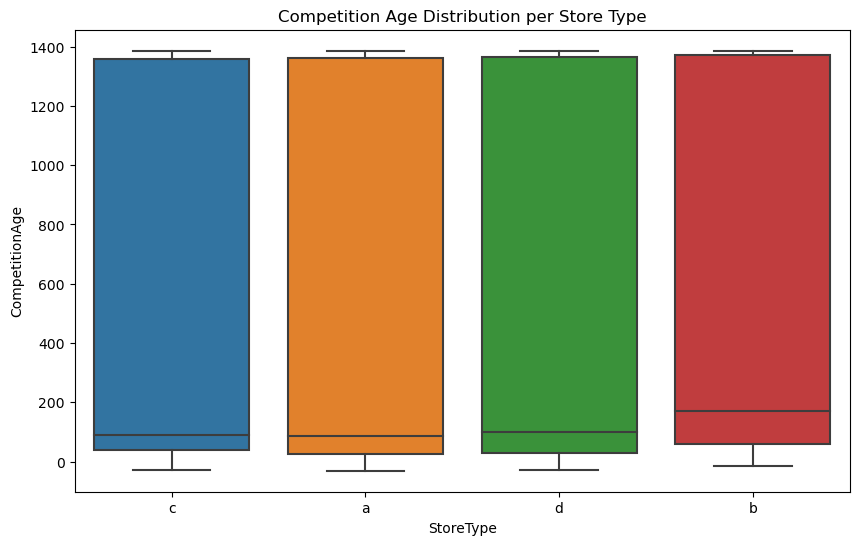

In [20]:
# Store Type vs. CompetitionAge
plt.figure(figsize=(10, 6))
sns.boxplot(x='StoreType', y='CompetitionAge', data=train_merged)
plt.title('Competition Age Distribution per Store Type')
plt.show()


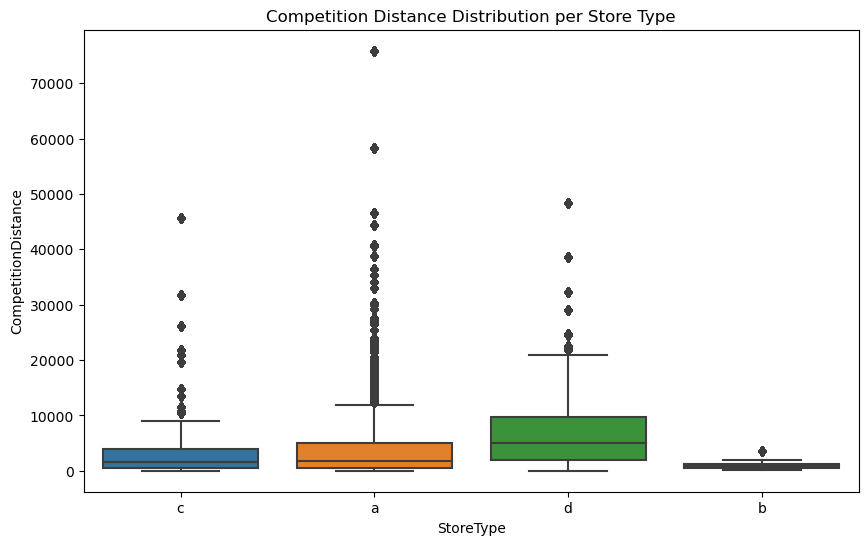

In [21]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='StoreType', y='CompetitionDistance', data=train_merged)
plt.title('Competition Distance Distribution per Store Type')
plt.show()


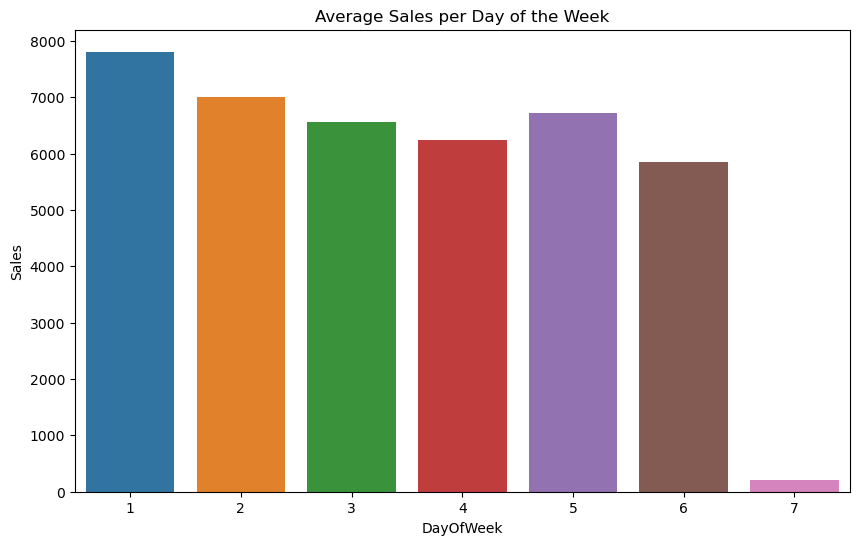

In [22]:
plt.figure(figsize=(10, 6))
sns.barplot(x='DayOfWeek', y='Sales', data=train_merged, ci=None)
plt.title('Average Sales per Day of the Week')
plt.show()


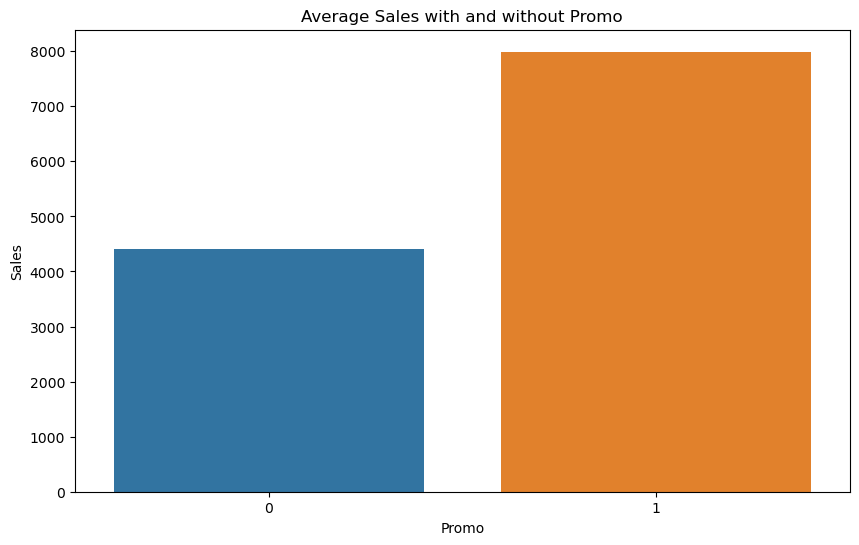

In [23]:
plt.figure(figsize=(10, 6))
sns.barplot(x='Promo', y='Sales', data=train_merged, ci=None)
plt.title('Average Sales with and without Promo')
plt.show()


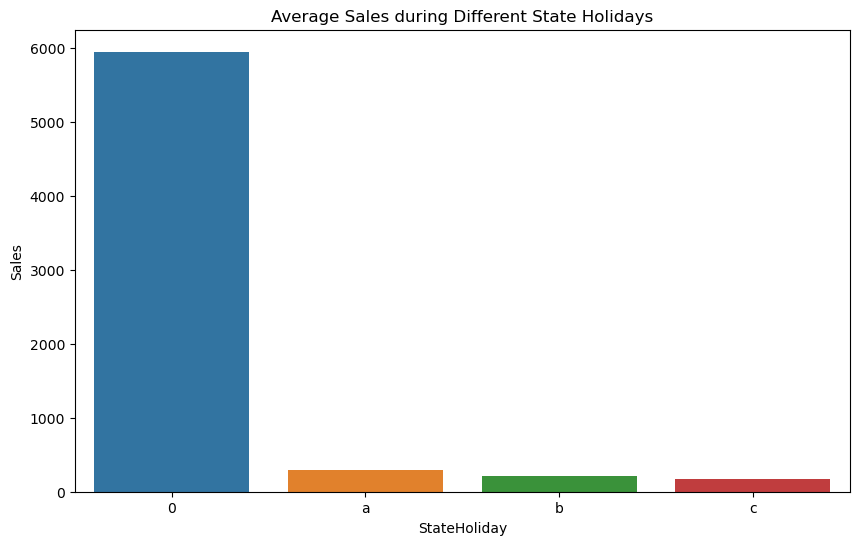

In [24]:
plt.figure(figsize=(10, 6))
sns.barplot(x='StateHoliday', y='Sales', data=train_merged, ci=None)
plt.title('Average Sales during Different State Holidays')
plt.show()


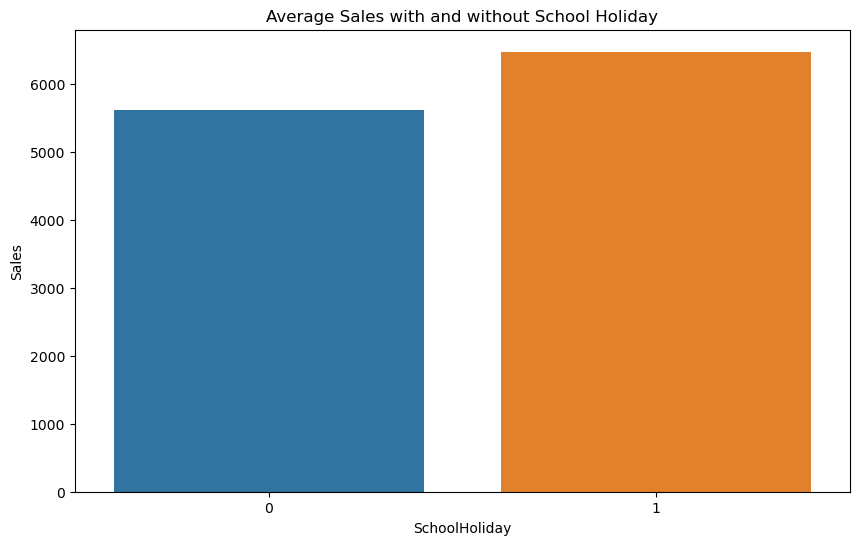

In [25]:
plt.figure(figsize=(10, 6))
sns.barplot(x='SchoolHoliday', y='Sales', data=train_merged, ci=None)
plt.title('Average Sales with and without School Holiday')
plt.show()


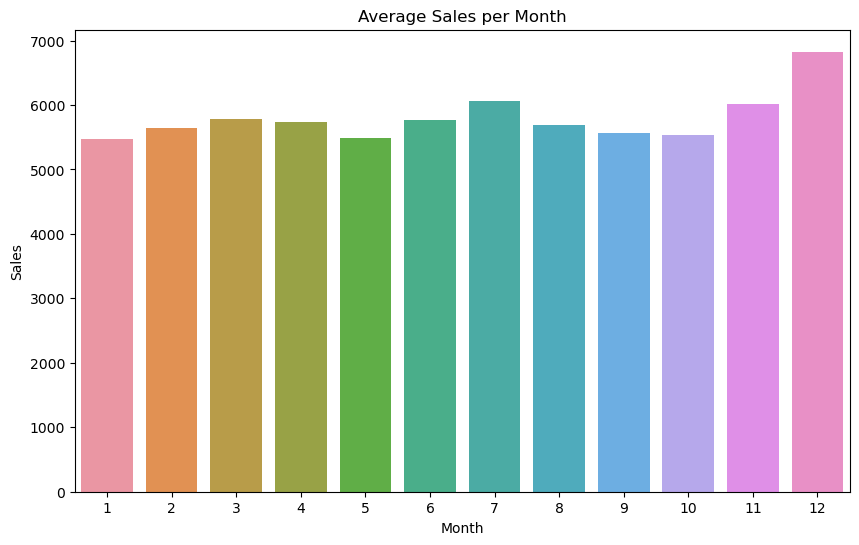

In [26]:
train_merged['Month'] = pd.to_datetime(train_merged['Date']).dt.month

plt.figure(figsize=(10, 6))
sns.barplot(x='Month', y='Sales', data=train_merged, ci=None)
plt.title('Average Sales per Month')
plt.show()


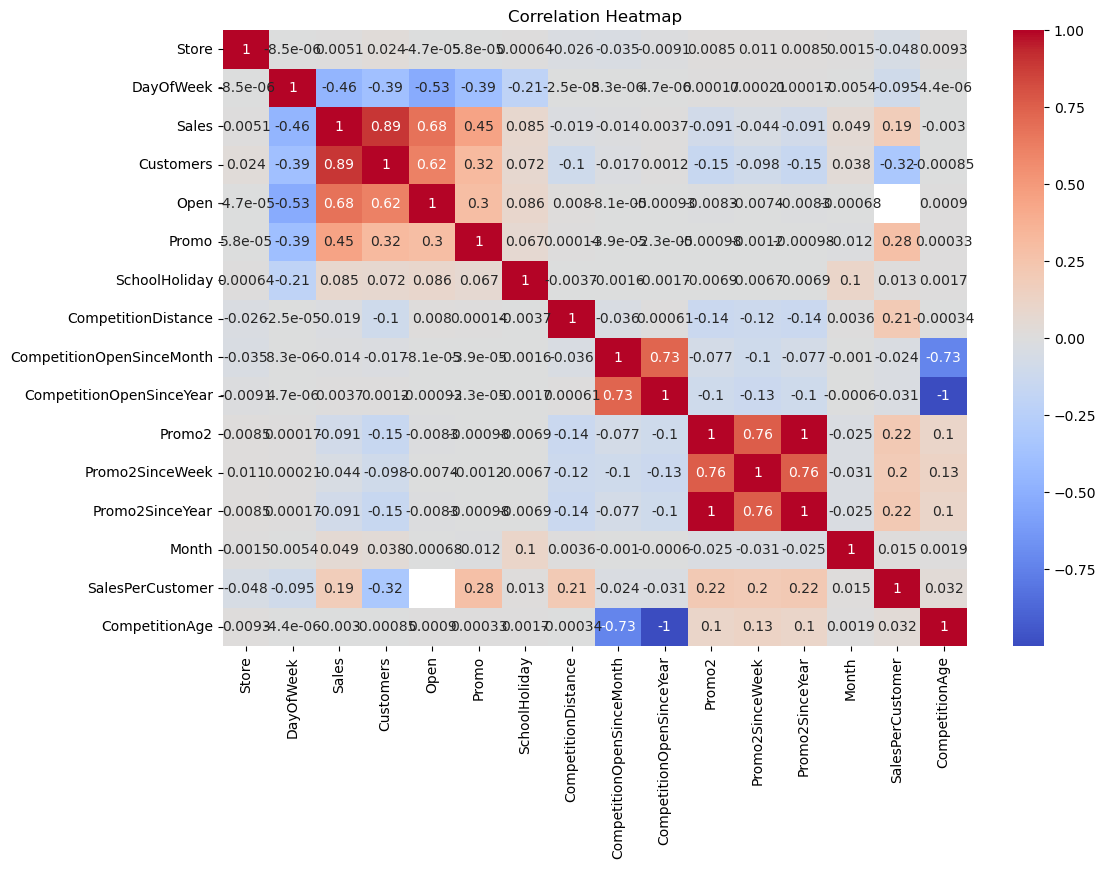

In [27]:
plt.figure(figsize=(12, 8))
sns.heatmap(train_merged.corr(), annot=True, cmap='coolwarm', center=0)
plt.title('Correlation Heatmap')
plt.show()


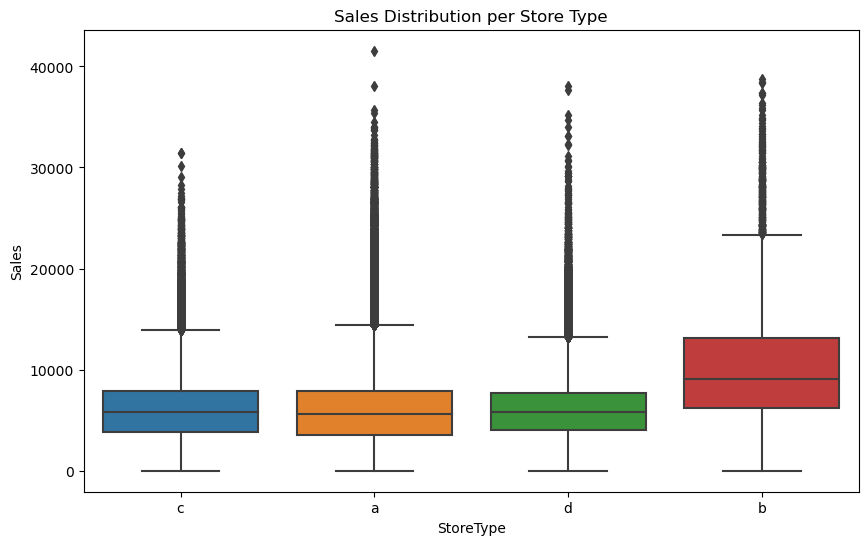

In [28]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='StoreType', y='Sales', data=train_merged)
plt.title('Sales Distribution per Store Type')
plt.show()


In [29]:
train_merged.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1017209 entries, 0 to 1017208
Data columns (total 21 columns):
 #   Column                     Non-Null Count    Dtype         
---  ------                     --------------    -----         
 0   Store                      1017209 non-null  int64         
 1   DayOfWeek                  1017209 non-null  int64         
 2   Date                       1017209 non-null  datetime64[ns]
 3   Sales                      1017209 non-null  int64         
 4   Customers                  1017209 non-null  int64         
 5   Open                       1017209 non-null  int64         
 6   Promo                      1017209 non-null  int64         
 7   StateHoliday               1017209 non-null  object        
 8   SchoolHoliday              1017209 non-null  int64         
 9   StoreType                  1017209 non-null  object        
 10  Assortment                 1017209 non-null  object        
 11  CompetitionDistance        1017209 no

In [30]:
train_merged['Day'] = train_merged['Date'].dt.day
train_merged['DayOfYear'] = train_merged['Date'].dt.dayofyear
train_merged['Week'] = train_merged['Date'].dt.week
train_merged['Year'] = train_merged['Date'].dt.year

test_merged['Day'] = test_merged['Date'].dt.day
test_merged['DayOfYear'] = test_merged['Date'].dt.dayofyear
test_merged['Week'] = test_merged['Date'].dt.week
test_merged['Year'] = test_merged['Date'].dt.year


C:\Users\bhumi\AppData\Local\Temp\ipykernel_6444\1557184498.py:3: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated. Please use Series.dt.isocalendar().week instead.
  train_merged['Week'] = train_merged['Date'].dt.week
C:\Users\bhumi\AppData\Local\Temp\ipykernel_6444\1557184498.py:8: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated. Please use Series.dt.isocalendar().week instead.
  test_merged['Week'] = test_merged['Date'].dt.week


In [31]:
train_merged['StateHoliday'] = (train_merged['StateHoliday'] != '0').astype(int)
test_merged['StateHoliday'] = (test_merged['StateHoliday'] != '0').astype(int)


In [32]:
train_merged = pd.get_dummies(train_merged, columns=['StoreType', 'Assortment', 'PromoInterval'], drop_first=True)
test_merged = pd.get_dummies(test_merged, columns=['StoreType', 'Assortment', 'PromoInterval'], drop_first=True)


In [33]:
train_merged['DaysSinceLastPromo'] = (train_merged['Date'] - train_merged.groupby('Store')['Date'].shift(-1)).dt.days
train_merged['DaysSinceLastPromo'].fillna(train_merged['DaysSinceLastPromo'].median(), inplace=True)
test_merged['DaysSinceLastPromo'] = (test_merged['Date'] - test_merged.groupby('Store')['Date'].shift(-1)).dt.days
test_merged['DaysSinceLastPromo'].fillna(test_merged['DaysSinceLastPromo'].median(), inplace=True)


In [34]:
from datetime import datetime, timedelta

def calculate_promo_cycle(row):
    if row['Promo2'] == 1:
        promo2_start_date = datetime(int(row['Promo2SinceYear']), 1, 1) + timedelta(weeks=int(row['Promo2SinceWeek']) - 1)
        days_since_promo2_start = (row['Date'] - promo2_start_date).days
        return days_since_promo2_start % 28
    else:
        return -1

train_merged['DaysInPromoCycle'] = train_merged.apply(calculate_promo_cycle, axis=1)
train_merged['PrimePromoCycle'] = (train_merged['DaysInPromoCycle'] <= 7).astype(int)

test_merged['DaysInPromoCycle'] = test_merged.apply(calculate_promo_cycle, axis=1)
test_merged['PrimePromoCycle'] = (test_merged['DaysInPromoCycle'] <= 7).astype(int)


In [35]:
train_merged['DaysInCompetition'] = (train_merged['Date'] - train_merged['CompetitionOpenSinceYear'].apply(lambda x: pd.to_datetime(x, format='%Y'))).dt.days
test_merged['DaysInCompetition'] = (test_merged['Date'] - test_merged['CompetitionOpenSinceYear'].apply(lambda x: pd.to_datetime(x, format='%Y'))).dt.days


In [36]:
def get_holiday_stats(df):
    df['StateHoliday'] = df['StateHoliday'].replace('0', 0).astype(int)
    df['PrevWeek'] = df['Month'] - 1
    df['NextWeek'] = df['Month'] + 1

    week_holiday_stats = df.groupby(['Store', 'Year', 'Month']).agg({'StateHoliday': 'sum'}).reset_index()
    week_holiday_stats.columns = ['Store', 'Year', 'Month', 'HolidaysThisWeek']

    week_holiday_stats['HolidaysLastWeek'] = week_holiday_stats.groupby('Store')['HolidaysThisWeek'].shift(1)
    week_holiday_stats['HolidaysNextWeek'] = week_holiday_stats.groupby('Store')['HolidaysThisWeek'].shift(-1)

    return pd.merge(df, week_holiday_stats, on=['Store', 'Year', 'Month'])

train_merged = get_holiday_stats(train_merged)
test_merged = get_holiday_stats(test_merged)


In [37]:
train_merged['DayOfMonth'] = train_merged['Date'].dt.day
test_merged['DayOfMonth'] = test_merged['Date'].dt.day


In [38]:
def days_since_last_state_holiday(df):
    df['DateInt'] = df['Date'].apply(lambda x: int(x.timestamp()))
    last_state_holiday = df[df['StateHoliday'] != 0].groupby('Store')['DateInt'].apply(list)
    days_since = []

    for index, row in df.iterrows():
        store = row['Store']
        if store in last_state_holiday:
            holidays = last_state_holiday[store]
            days_since.append(min((row['DateInt'] - h for h in holidays if h < row['DateInt']), default=0))
        else:
            days_since.append(0)

    df['DaysSinceLastStateHoliday'] = days_since
    df.drop('DateInt', axis=1, inplace=True)

    return df

train_merged = days_since_last_state_holiday(train_merged)
test_merged = days_since_last_state_holiday(test_merged)


In [39]:
def days_until_next_state_holiday(df):
    df['DateInt'] = df['Date'].apply(lambda x: int(x.timestamp()))
    next_state_holiday = df[df['StateHoliday'] != 0].groupby('Store')['DateInt'].apply(list)
    days_until = []

    for index, row in df.iterrows():
        store = row['Store']
        if store in next_state_holiday:
            holidays = next_state_holiday[store]
            days_until.append(min((h - row['DateInt'] for h in holidays if h > row['DateInt']), default=0))
        else:
            days_until.append(0)

    df['DaysUntilNextStateHoliday'] = days_until
    df.drop('DateInt', axis=1, inplace=True)

    return df

train_merged = days_until_next_state_holiday(train_merged)
test_merged = days_until_next_state_holiday(test_merged)


In [40]:
# Calculate mean sales per customer per store
mean_sales_customer_store = train_merged.groupby('Store')['SalesPerCustomer'].mean().reset_index()
mean_sales_customer_store.columns = ['Store', 'MeanSalesPerCustomer']
train_merged = train_merged.merge(mean_sales_customer_store, on='Store', how='left')
test_merged = test_merged.merge(mean_sales_customer_store, on='Store', how='left')

# Calculate mean sales per store per day of the week
mean_sales_store_day = train_merged.groupby(['Store', 'DayOfWeek'])['Sales'].mean().reset_index()
mean_sales_store_day.columns = ['Store', 'DayOfWeek', 'MeanSalesPerStoreDay']
train_merged = train_merged.merge(mean_sales_store_day, on=['Store', 'DayOfWeek'], how='left')
test_merged = test_merged.merge(mean_sales_store_day, on=['Store', 'DayOfWeek'], how='left')

# Calculate mean sales per store per month
mean_sales_store_month = train_merged.groupby(['Store', 'Month'])['Sales'].mean().reset_index()
mean_sales_store_month.columns = ['Store', 'Month', 'MeanSalesPerStoreMonth']
train_merged = train_merged.merge(mean_sales_store_month, on=['Store', 'Month'], how='left')
test_merged = test_merged.merge(mean_sales_store_month, on=['Store', 'Month'], how='left')

# Calculate mean sales per store per promo
mean_sales_store_promo = train_merged.groupby(['Store', 'Promo'])['Sales'].mean().reset_index()
mean_sales_store_promo.columns = ['Store', 'Promo', 'MeanSalesPerStorePromo']
train_merged = train_merged.merge(mean_sales_store_promo, on=['Store', 'Promo'], how='left')
test_merged = test_merged.merge(mean_sales_store_promo, on=['Store', 'Promo'], how='left')

# Calculate sales trend
train_merged['SalesTrend'] = train_merged['Sales'] - train_merged['Sales'].rolling(window=7).mean()
train_merged['SalesTrend'] = train_merged['SalesTrend'].fillna(0)  # Fill initial missing values with zeros

# Impute missing values for HolidaysLastWeek and HolidaysNextWeek
train_merged['HolidaysLastWeek'] = train_merged['HolidaysLastWeek'].fillna(train_merged['HolidaysLastWeek'].mean())
train_merged['HolidaysNextWeek'] = train_merged['HolidaysNextWeek'].fillna(train_merged['HolidaysNextWeek'].mean())

test_merged['HolidaysLastWeek'] = test_merged['HolidaysLastWeek'].fillna(train_merged['HolidaysLastWeek'].mean())
test_merged['HolidaysNextWeek'] = test_merged['HolidaysNextWeek'].fillna(train_merged['HolidaysNextWeek'].mean())

# Drop unnecessary columns
train_merged = train_merged.drop(columns=['Customers', 'SalesPerCustomer'])

# Update the info
train_merged.info()
test_merged.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 1017209 entries, 0 to 1017208
Data columns (total 45 columns):
 #   Column                          Non-Null Count    Dtype         
---  ------                          --------------    -----         
 0   Store                           1017209 non-null  int64         
 1   DayOfWeek                       1017209 non-null  int64         
 2   Date                            1017209 non-null  datetime64[ns]
 3   Sales                           1017209 non-null  int64         
 4   Open                            1017209 non-null  int64         
 5   Promo                           1017209 non-null  int64         
 6   StateHoliday                    1017209 non-null  int32         
 7   SchoolHoliday                   1017209 non-null  int64         
 8   CompetitionDistance             1017209 non-null  float64       
 9   CompetitionOpenSinceMonth       1017209 non-null  float64       
 10  CompetitionOpenSinceYear        1017209 no

In [41]:
# Compute the correlation matrix
corr_matrix = train_merged.drop(columns=['Sales', 'SalesTrend']).corr()

# Find features with a correlation coefficient greater than the threshold
threshold = 0.99
highly_correlated_features = set()
for i in range(len(corr_matrix.columns)):
    for j in range(i+1, len(corr_matrix.columns)):
        if abs(corr_matrix.iloc[i, j]) > threshold:
            highly_correlated_features.add(corr_matrix.columns[j])

# Remove highly correlated features from the train and test datasets
train_merged = train_merged.drop(columns=highly_correlated_features)
test_merged = test_merged.drop(columns=highly_correlated_features)


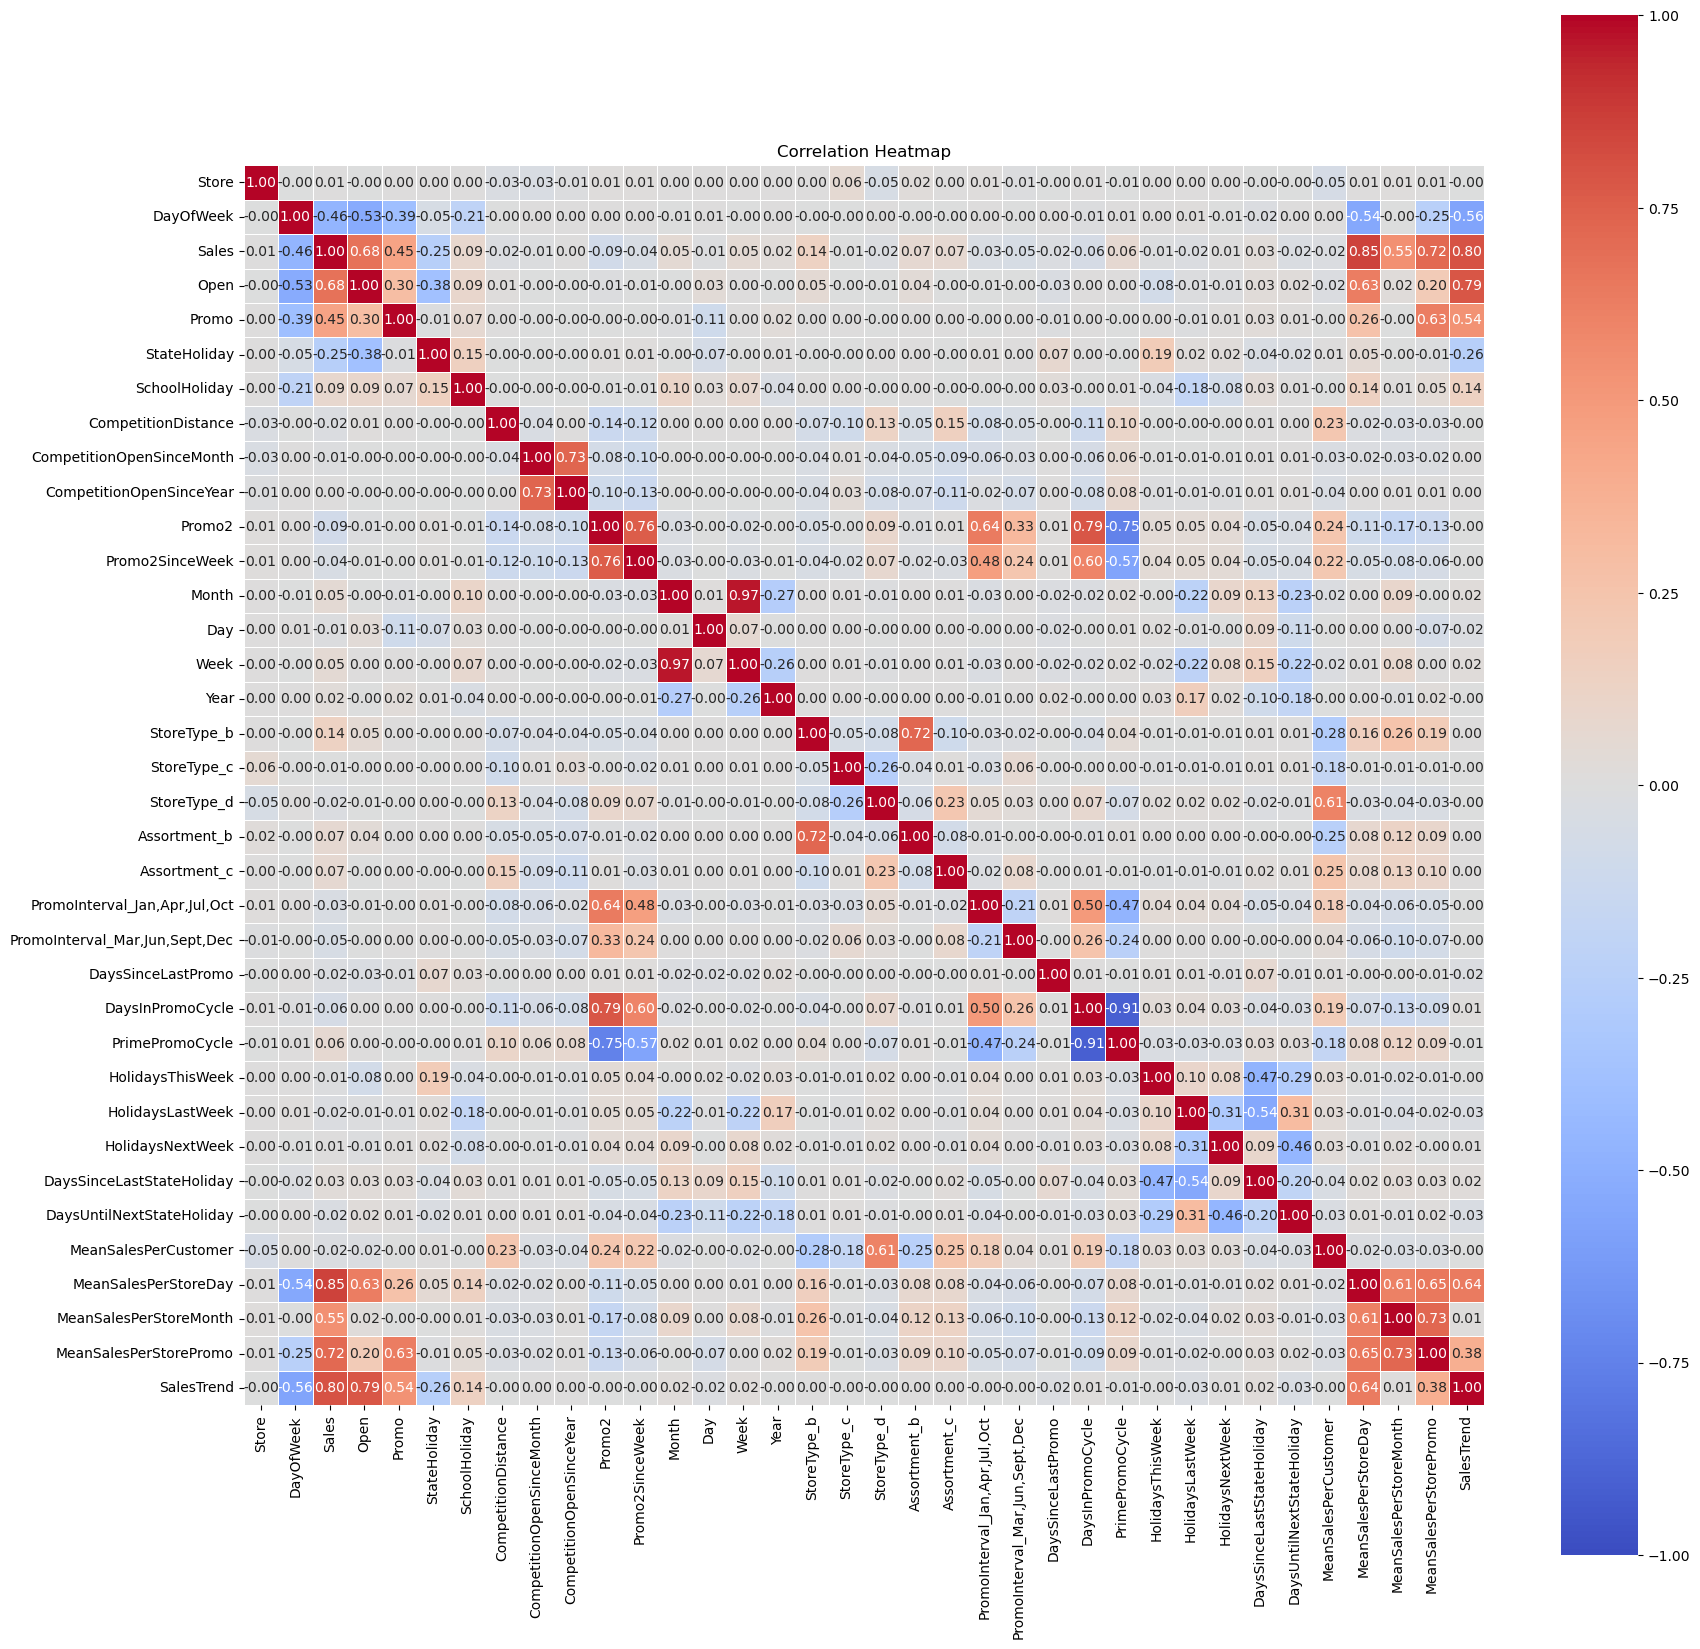

In [42]:
# Compute the correlation matrix
corr_matrix = train_merged.corr()

# Generate a heatmap using seaborn
plt.figure(figsize=(20, 20))
sns.heatmap(corr_matrix, annot=True, fmt='.2f', cmap='coolwarm', vmin=-1, vmax=1, square=True, linewidths=0.5)
plt.title("Correlation Heatmap")
plt.show()

In [43]:
train_merged.info()
test_merged.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1017209 entries, 0 to 1017208
Data columns (total 37 columns):
 #   Column                          Non-Null Count    Dtype         
---  ------                          --------------    -----         
 0   Store                           1017209 non-null  int64         
 1   DayOfWeek                       1017209 non-null  int64         
 2   Date                            1017209 non-null  datetime64[ns]
 3   Sales                           1017209 non-null  int64         
 4   Open                            1017209 non-null  int64         
 5   Promo                           1017209 non-null  int64         
 6   StateHoliday                    1017209 non-null  int32         
 7   SchoolHoliday                   1017209 non-null  int64         
 8   CompetitionDistance             1017209 non-null  float64       
 9   CompetitionOpenSinceMonth       1017209 non-null  float64       
 10  CompetitionOpenSinceYear        1017209 no

In [44]:
# Day of the year
train_merged['DayOfYear'] = train_merged['Date'].dt.dayofyear
test_merged['DayOfYear'] = test_merged['Date'].dt.dayofyear

# Create a temporary dataframe to calculate shop-level daily average sales
shop_daily_sales = train_merged.groupby(['Store', 'Date'])['Sales'].mean().reset_index()
shop_daily_sales.columns = ['Store', 'Date', 'ShopAvgSales']

# Merge the temporary dataframe with the original dataframes
train_merged = train_merged.merge(shop_daily_sales, on=['Store', 'Date'], how='left')
test_merged = test_merged.merge(shop_daily_sales, on=['Store', 'Date'], how='left')

# Calculate shop-level average sales on school holidays
shop_school_holiday_sales = train_merged.groupby(['Store', 'SchoolHoliday'])['Sales'].mean().reset_index()
shop_school_holiday_sales = shop_school_holiday_sales[shop_school_holiday_sales['SchoolHoliday'] == 1]
shop_school_holiday_sales.columns = ['Store', 'SchoolHoliday', 'ShopAvgSchoolHolidaySales']
shop_school_holiday_sales.drop('SchoolHoliday', axis=1, inplace=True)

# Merge the temporary dataframe with the original dataframes
train_merged = train_merged.merge(shop_school_holiday_sales, on='Store', how='left')
test_merged = test_merged.merge(shop_school_holiday_sales, on='Store', how='left')

# Calculate shop-level average sales on Saturdays
shop_saturday_sales = train_merged[train_merged['DayOfWeek'] == 6].groupby('Store')['Sales'].mean().reset_index()
shop_saturday_sales.columns = ['Store', 'ShopAvgSaturdaySales']

# Merge the temporary dataframe with the original dataframes
train_merged = train_merged.merge(shop_saturday_sales, on='Store', how='left')
test_merged = test_merged.merge(shop_saturday_sales, on='Store', how='left')


In [45]:
train_merged.head()

,Store,DayOfWeek,Date,Sales,Open,Promo,StateHoliday,SchoolHoliday,CompetitionDistance,CompetitionOpenSinceMonth,...,DaysUntilNextStateHoliday,MeanSalesPerCustomer,MeanSalesPerStoreDay,MeanSalesPerStoreMonth,MeanSalesPerStorePromo,SalesTrend,DayOfYear,ShopAvgSales,ShopAvgSchoolHolidaySales,ShopAvgSaturdaySales
0,1,5,2015-07-31,5263,1,1,0,1,1270.0,9.0,...,0,8.393038,4516.414815,3998.946237,5152.886111,0.0,212,5263.0,3976.227979,4942.970149
1,1,4,2015-07-30,5020,1,1,0,1,1270.0,9.0,...,0,8.393038,4094.607407,3998.946237,5152.886111,0.0,211,5020.0,3976.227979,4942.970149
2,1,3,2015-07-29,4782,1,1,0,1,1270.0,9.0,...,0,8.393038,4454.474074,3998.946237,5152.886111,0.0,210,4782.0,3976.227979,4942.970149
3,1,2,2015-07-28,5011,1,1,0,1,1270.0,9.0,...,0,8.393038,4650.918519,3998.946237,5152.886111,0.0,209,5011.0,3976.227979,4942.970149
4,1,1,2015-07-27,6102,1,1,0,1,1270.0,9.0,...,0,8.393038,4946.119403,3998.946237,5152.886111,0.0,208,6102.0,3976.227979,4942.970149


In [46]:
train_merged.info()
test_merged.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1017209 entries, 0 to 1017208
Data columns (total 41 columns):
 #   Column                          Non-Null Count    Dtype         
---  ------                          --------------    -----         
 0   Store                           1017209 non-null  int64         
 1   DayOfWeek                       1017209 non-null  int64         
 2   Date                            1017209 non-null  datetime64[ns]
 3   Sales                           1017209 non-null  int64         
 4   Open                            1017209 non-null  int64         
 5   Promo                           1017209 non-null  int64         
 6   StateHoliday                    1017209 non-null  int32         
 7   SchoolHoliday                   1017209 non-null  int64         
 8   CompetitionDistance             1017209 non-null  float64       
 9   CompetitionOpenSinceMonth       1017209 non-null  float64       
 10  CompetitionOpenSinceYear        1017209 no

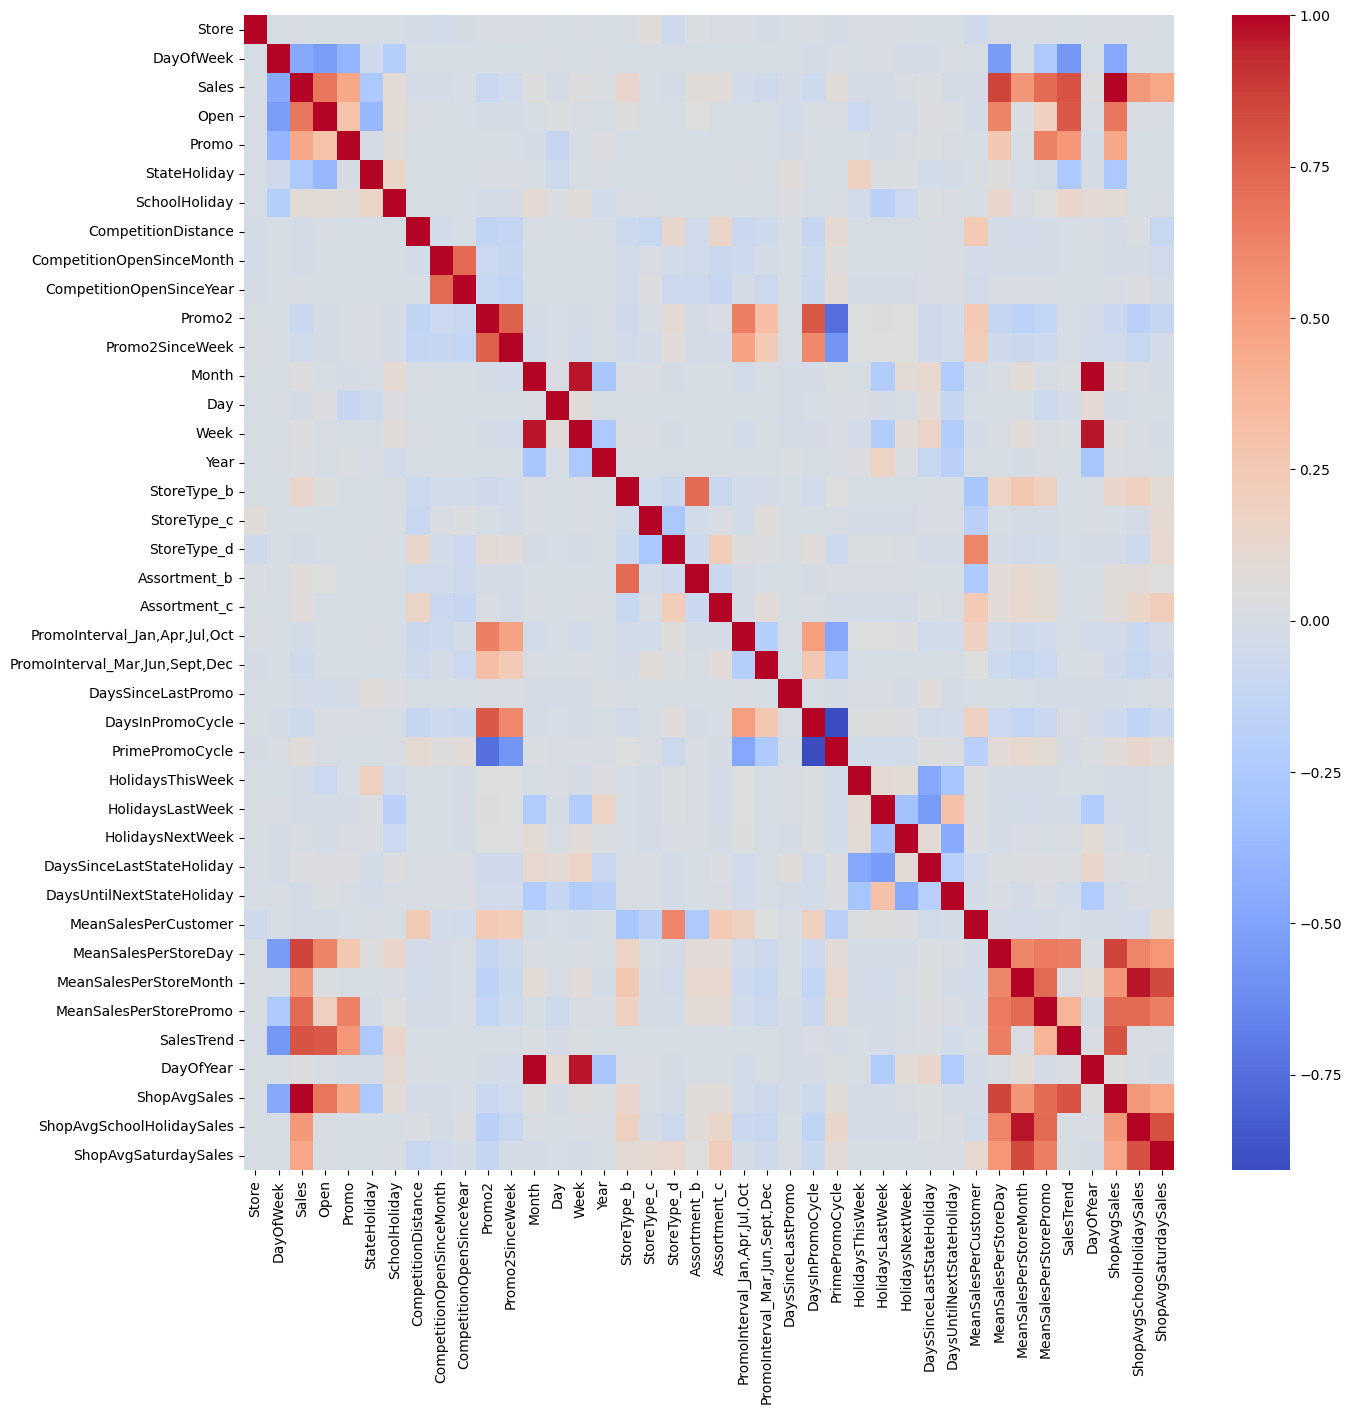

In [47]:
# Drop the 'Date' column
train_merged = train_merged.drop('Date', axis=1)
test_merged = test_merged.drop('Date', axis=1)

# Compute the correlation matrix
corr = train_merged.corr()

# Plot the heatmap
plt.figure(figsize=(15, 15))
sns.heatmap(corr, annot=False, cmap="coolwarm")
plt.show()


In [63]:
X_train = train_merged.drop(columns=['Sales', 'SalesTrend', 'DayOfYear'], axis=1)
y_train = train_merged['Sales']
X_test = test_merged.drop(['Id', 'DayOfYear'], axis=1)

# Split the training data into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42)


In [64]:
model = xgb.XGBRegressor(
    n_estimators=1000,
    max_depth=6,
    learning_rate=0.1,
    min_child_weight=5,
    subsample=0.8,
    colsample_bytree=0.8,
    random_state=42
)


In [66]:
model.fit(
    X_train,
    y_train,
    eval_set=[(X_val, y_val)],
    early_stopping_rounds=50,
    verbose=10
)

y_pred = model.predict(X_test)


[0]	validation_0-rmse:6233.34201
[10]	validation_0-rmse:2221.76664
[20]	validation_0-rmse:795.04848
[30]	validation_0-rmse:312.72161
[40]	validation_0-rmse:146.98193
[50]	validation_0-rmse:90.98121
[60]	validation_0-rmse:68.76143
[70]	validation_0-rmse:58.12529
[80]	validation_0-rmse:51.73671
[90]	validation_0-rmse:46.76336
[100]	validation_0-rmse:43.39949
[110]	validation_0-rmse:40.52917
[120]	validation_0-rmse:38.33465
[130]	validation_0-rmse:36.72453
[140]	validation_0-rmse:35.45187
[150]	validation_0-rmse:34.22032
[160]	validation_0-rmse:33.05792
[170]	validation_0-rmse:32.12202
[180]	validation_0-rmse:31.37480
[190]	validation_0-rmse:30.73534
[200]	validation_0-rmse:30.06979
[210]	validation_0-rmse:29.55516
[220]	validation_0-rmse:29.09984
[230]	validation_0-rmse:28.71851
[240]	validation_0-rmse:28.35506
[250]	validation_0-rmse:27.97407
[260]	validation_0-rmse:27.56831
[270]	validation_0-rmse:27.24592
[280]	validation_0-rmse:26.86101
[290]	validation_0-rmse:26.63113
[300]	validati

In [67]:
sample_submission = pd.DataFrame({'Id': test_merged['Id'], 'Sales': y_pred})
sample_submission.to_csv('sample_submission.csv', index=False)


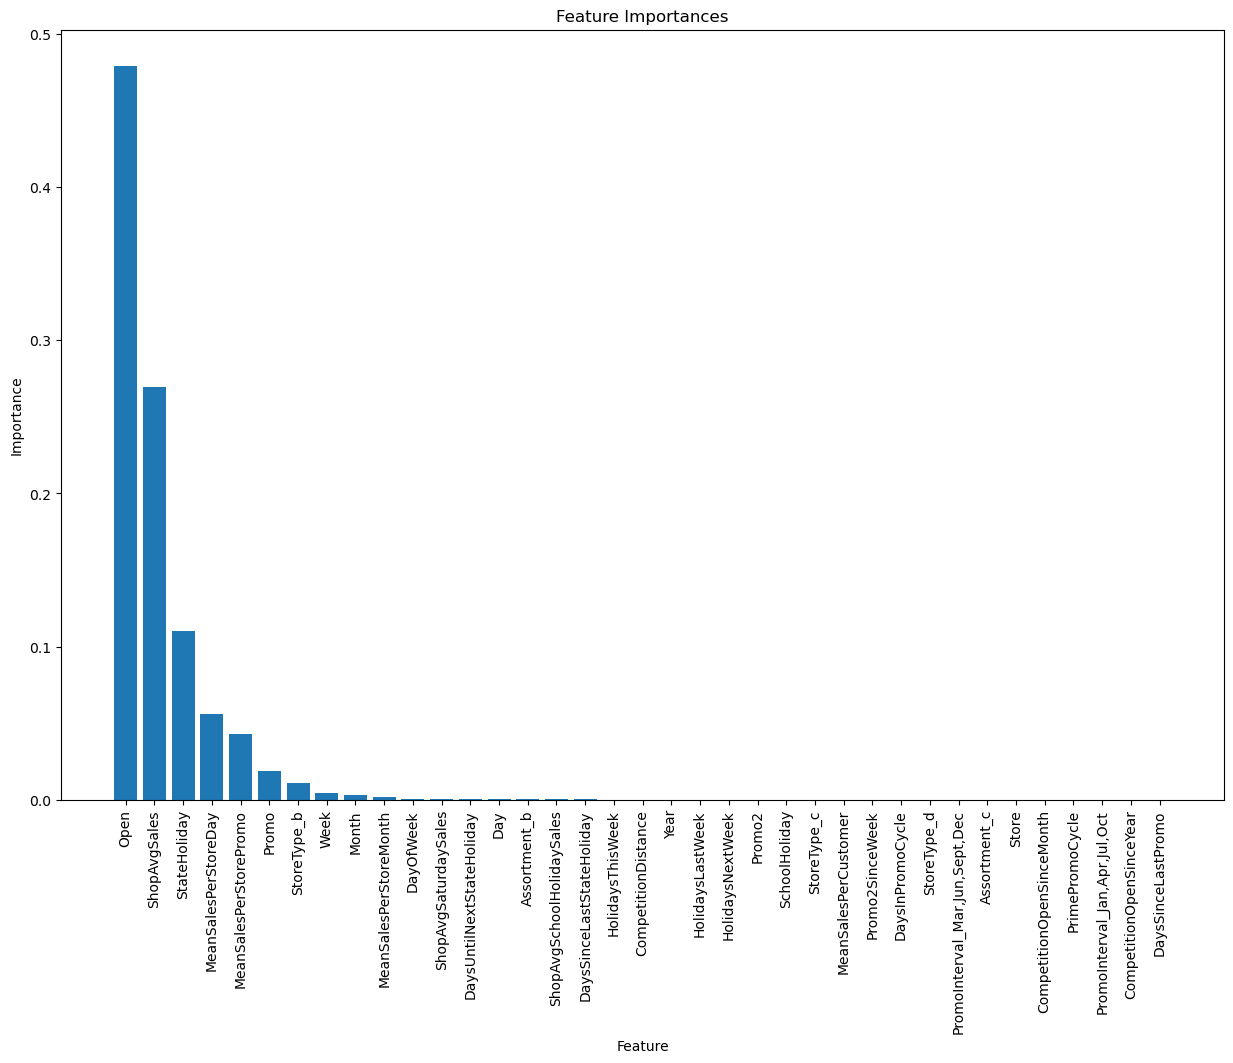

In [68]:
# Get feature importances from the XGBoost model
feature_importances = model.feature_importances_

# Get the feature names from the train_merged DataFrame
feature_names = train_merged.drop(columns=['Sales', 'SalesTrend', 'DayOfYear'], axis=1).columns

# Sort the feature importances in descending order
sorted_idx = np.argsort(feature_importances)[::-1]

# Plot the feature importances
plt.figure(figsize=(15, 10))
plt.bar(range(X_train.shape[1]), feature_importances[sorted_idx])
plt.xticks(range(X_train.shape[1]), feature_names[sorted_idx], rotation='vertical')
plt.xlabel('Feature')
plt.ylabel('Importance')
plt.title('Feature Importances')
plt.show()


In [71]:
import numpy as np

# Round the predicted sales values
y_pred_rounded = np.round(y_pred)

# Create a submission DataFrame with the correct Id order and rounded sales values
submission_rounded = pd.DataFrame({'Id': test_merged['Id'].values, 'Sales': y_pred_rounded})

# Save the submission DataFrame to a CSV file
submission_rounded.to_csv('submission_rounded.csv', index=False)


In [77]:
print("Columns in the train dataset:")
print(X_train.columns)

print("\nColumns in the test dataset:")
print(X_test.columns)


Columns in the train dataset:
Index(['Store', 'DayOfWeek', 'Open', 'Promo', 'StateHoliday', 'SchoolHoliday',
       'CompetitionDistance', 'CompetitionOpenSinceMonth',
       'CompetitionOpenSinceYear', 'Promo2', 'Promo2SinceWeek', 'Month', 'Day',
       'Week', 'Year', 'StoreType_b', 'StoreType_c', 'StoreType_d',
       'Assortment_b', 'Assortment_c', 'PromoInterval_Jan,Apr,Jul,Oct',
       'PromoInterval_Mar,Jun,Sept,Dec', 'DaysSinceLastPromo',
       'DaysInPromoCycle', 'PrimePromoCycle', 'HolidaysThisWeek',
       'HolidaysLastWeek', 'HolidaysNextWeek', 'DaysSinceLastStateHoliday',
       'DaysUntilNextStateHoliday', 'MeanSalesPerCustomer',
       'MeanSalesPerStoreDay', 'MeanSalesPerStoreMonth',
       'MeanSalesPerStorePromo', 'ShopAvgSales', 'ShopAvgSchoolHolidaySales',
       'ShopAvgSaturdaySales'],
      dtype='object')

Columns in the test dataset:
Index(['Store', 'DayOfWeek', 'Open', 'Promo', 'StateHoliday', 'SchoolHoliday',
       'CompetitionDistance', 'CompetitionOpenSin

In [76]:
X_test = X_test.drop(columns=['DayOfYear'], axis=1)


In [79]:
import csv

# Make predictions on the test set
y_pred = model.predict(X_test)

# Round the predictions to the nearest integer
y_pred_rounded = np.round(y_pred).astype(int)

# Create a submission DataFrame with the correct Id order
submission = pd.DataFrame({"Id": test["Id"], "Sales": y_pred_rounded})

# Save the submission file with double quotes around column names
submission.to_csv("submission.csv", index=False, quoting=csv.QUOTE_NONNUMERIC, quotechar='"')
